# Natural Language Processing (NLP)

In [1]:
import pandas as pd 
import numpy as np 
import scipy as sp

In [2]:
#!pip install nltk #Natural Language tool kit

In [3]:
import nltk

In [4]:
#nltk.download("punkt")

In [5]:
from nltk.tokenize import sent_tokenize # paragraftan cümleleri ayırıp liste haline getirir

In [6]:
text="Welcome raders . I hope you find it interesting . Please do reply."
print(sent_tokenize(text))

['Welcome raders .', 'I hope you find it interesting .', 'Please do reply.']


In [7]:
# word tokenization 
from nltk.tokenize import word_tokenize
text =word_tokenize("PierreVinken , 59 years old , wiil join as a non excutive director on Nov 29 .")
print(text)

['PierreVinken', ',', '59', 'years', 'old', ',', 'wiil', 'join', 'as', 'a', 'non', 'excutive', 'director', 'on', 'Nov', '29', '.']


In [8]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
tokenizer.tokenize("Don't Have a nice day. I , hope you find the book interesting")

['Do',
 "n't",
 'Have',
 'a',
 'nice',
 'day.',
 'I',
 ',',
 'hope',
 'you',
 'find',
 'the',
 'book',
 'interesting']

# Stemmer and Lemmatizer

* stemmer:kelimenin eklerini atar
  * porter
  * lancaster
  * regexp
  * snowball
* Lemmatizer : kök bulur

kökü aynı olan aynı anlam vermek isteyen kelimeleri farklı algılanmasın diye

### PorterStemmer

PorterStemmer=kök bulur

In [9]:
from nltk.stem import PorterStemmer
stemmmerporter = PorterStemmer()
stemmmerporter.stem("happiness")

'happi'

### LancasterStemmer

In [10]:
from nltk.stem import LancasterStemmer
stemmerlan = LancasterStemmer()
stemmerlan.stem("happiness")

'happy'

### RegexpStemmer

In [11]:
from nltk.stem import RegexpStemmer
stemmeregexp = RegexpStemmer("ing")
print(stemmeregexp.stem("working"))
print(stemmeregexp.stem("happiness"))
print(stemmeregexp.stem("pairing"))

work
happiness
pair


### Snowball Stemmer

In [12]:
from nltk.stem import SnowballStemmer
print(SnowballStemmer.languages)
spanishstemmer = SnowballStemmer("spanish")
print(spanishstemmer.stem("comiende"))

frenchstemmer = SnowballStemmer("french")
print(frenchstemmer.stem("manager"))

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')
comiend
manag


### Lemmatization

### POS - Part of Speech, isim, fiil, özne, sıfat, zamir, zarf, proposition

In [13]:
# nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer_output = WordNetLemmatizer()
print(lemmatizer_output.lemmatize("working"))

# bu kelimenin fiil olduğu gsöylüyoruz verb = v
print(lemmatizer_output.lemmatize("working",pos="v"))

print(lemmatizer_output.lemmatize("works"))

working
work
work


#### difference between stemming and lemmatization

In [14]:
from nltk.stem import PorterStemmer
stemmer_output=PorterStemmer()
stemmer_output.stem("Mens")

'men'

In [15]:
from nltk.stem import WordNetLemmatizer
lemmatizer_output=WordNetLemmatizer()
lemmatizer_output.lemmatize("Mens")

'Mens'

## Part of Speech Tagging and POS Tagger
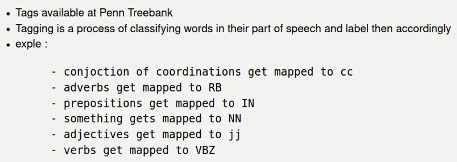

In [16]:
import nltk
#nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize
text=word_tokenize("It is a pleasant day today")
nltk.pos_tag(text)#pos_tagger textteki kelimelerin ,ögelerini yani türünü gösteriyor

[('It', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('pleasant', 'JJ'),
 ('day', 'NN'),
 ('today', 'NN')]

In [17]:
text=word_tokenize("They buy the permit in ordeer to be able to attend the event")
nltk.pos_tag(text)
# cümleyi öğrelerine ayırır word_tokenize, post_tag ise tagler

[('They', 'PRP'),
 ('buy', 'VBP'),
 ('the', 'DT'),
 ('permit', 'NN'),
 ('in', 'IN'),
 ('ordeer', 'NN'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('able', 'JJ'),
 ('to', 'TO'),
 ('attend', 'VB'),
 ('the', 'DT'),
 ('event', 'NN')]

Aslında buraya kadar olan kısım 5. dersin son kısımları

In [18]:
import nltk
from nltk.tag import DefaultTagger
tag = DefaultTagger("He is the man")
tag.tag(["Beautiful","morning"])

[('Beautiful', 'He is the man'), ('morning', 'He is the man')]

### Language conversion & Text formatting & Grammar 

In [19]:
# !pip install autocorrect

In [20]:
from autocorrect import Speller
spell = Speller("en")
spell('Tghe')

'The'

### TextBlob
* It is a python library for textual data processing. It provides an interface for common natural language processing tasks.

In [21]:
# !pip install textblob

In [22]:
from textblob import TextBlob
b = TextBlob("I havv good speling!")
#print(b.detect_language()) # çalışmıyor
print(b.correct())

I have good spelling!


In [23]:
from textblob import Word
w = Word("falability")
w.spellcheck()

[('fallibility', 0.3333333333333333),
 ('capability', 0.3333333333333333),
 ('affability', 0.3333333333333333)]

In [24]:
#!pip install langdetect

In [25]:
from langdetect import detect
print(detect("War doesn't show who's right , just who's left"))
print(detect("Ein , zwei ,drei,vier"))
print(detect("Eu gosto de mulher"))
print(detect("Nasılsınız?"))


en
de
pt
tr


In [26]:
blob = TextBlob("hello")
blob.translate(from_lang='en', to='fr')

TextBlob("bonjour")

In [27]:
en_blob=TextBlob(u"Who am I ?") #u demek utf8 demek
en_blob.translate(from_lang="en",to='de')

TextBlob("Wer bin ich ?")

# TF-IDF Term Frequency - Inverse Document Frequency
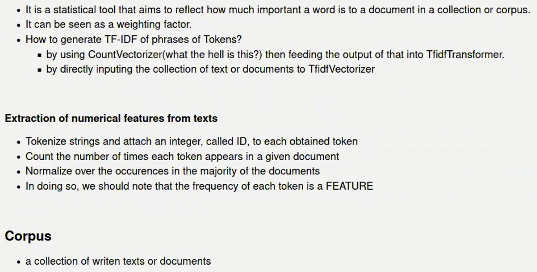

In [28]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

simple_train=["Call you tonight","Call me a cab","please call me .... PLEASE!"]

vect=CountVectorizer() #dummy variable çevirmek gibi
# Kelimeleri vektöre dönüştürüyor
# bu kelimeleri bir sparse matrix e atıyor
tf=pd.DataFrame(vect.fit_transform(simple_train).toarray(),columns=vect.get_feature_names_out())
#fit_transform learn the vocab dict and return term-document matrix
# column isimlerini feature isimleri ile değiştiriyor 
tf
#tf=Term Freqency,Cümle içinde kelimeler ne kadar geçiyor?
# 'a' dahil degil mesela

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


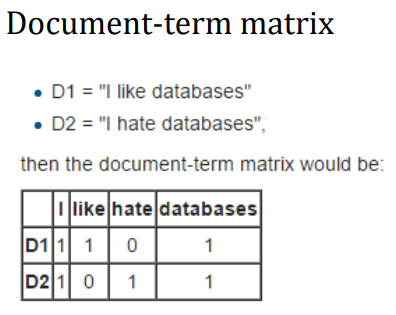

In [29]:
vect=CountVectorizer() # binary=True yaziyodu icinde ama kaldirdim tf/df yanlis geliyordu bence
df=vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1,6),columns=vect.get_feature_names_out())
#df=Document Freqency, document yani tamamında ne kadar geçiyor 

,cab,call,me,please,tonight,you
0,1,3,2,2,1,1


In [30]:
tf/df # why is that? What is the purpose?
# o cumlede ne kadar gecti / tum cumlelerde ne kadar gecti

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,1.0,0.0,0.0


In [31]:
# Term Frequency-Inverse Document Frequency (TF-IDF)
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(),columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


## CountVectorizer - Fit Transform with NLP

In [32]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(min_df=1)
#minimum bir harf olcak demek # aslinda 2 cunku 'a' yi almadi
#yani boşları karakter olarak almayacak

corpus=["This is the a first document","This is the second document","And the third one","Is this the first document ? "]

X=vectorizer.fit_transform(corpus)
# her kelimenin vektör uzarında 0 kabul ettiğimiz yere uzaklığını verir

pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
#burda get_feature_names diyince bu matrixlere isim  koyuyoruz

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,1,0,1,0,1,1,0,1
2,1,0,0,0,1,0,1,1,0
3,0,1,1,1,0,0,1,0,1


In [33]:
print(X)

  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	1
  (1, 5)	1
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1


## Yelp review analysis

- #### Projeye başlarken yapılması gerekenler
 -
 - Bütün cümleler küçük harf yapıyoruz
 - Noktalama işaretlerini kaldır
 - rakamları kaldır
 - satır sonu \n \r
 - stop wordsleri kaldır (gereksiz kelimeler)
 - Tokenize etmeliyiz
 - Lemma ve Stema - Ekleri kaldırıp kökü bulmak için
 - Vectorizer ile yazıları rakama atıyoruz 

In [34]:
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB # 3 veya daha fazla seçenek için
from sklearn.linear_model import LogisticRegression # 2 seçenek varsa kullanılır
from textblob import TextBlob , Word
from sklearn import metrics
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [35]:
yelp=pd.read_csv("yelp.csv")
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [36]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [37]:
yelp["text"]=yelp["text"].str.lower()

In [38]:
yelp["text"].str.replace("[^\w\s]","")

C:\Users\Azmi\AppData\Local\Temp\ipykernel_10280\1083425405.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  yelp["text"].str.replace("[^\w\s]","")


0       my wife took me here on my birthday for breakf...
1       i have no idea why some people give bad review...
2       love the gyro plate rice is so good and i also...
3       rosie dakota and i love chaparral dog park its...
4       general manager scott petello is a good egg no...
                              ...                        
9995    first visithad lunch here today  used my group...
9996    should be called house of deliciousness\n\ni c...
9997    i recently visited olive and ivy for business ...
9998    my nephew just moved to scottsdale recently so...
9999    45 locations all 45 star average i think arizo...
Name: text, Length: 10000, dtype: object

In [39]:
yelp["text"]=yelp["text"].str.replace("[^\w\s]","")
# burda gereksiz karakterleri kaldırıyor noktalama vb.

C:\Users\Azmi\AppData\Local\Temp\ipykernel_10280\1968110083.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  yelp["text"]=yelp["text"].str.replace("[^\w\s]","")


In [40]:
yelp["text"]=yelp["text"].str.replace("\d+","")
# digit yani sayıları çıkarıyoruz

C:\Users\Azmi\AppData\Local\Temp\ipykernel_10280\232096335.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  yelp["text"]=yelp["text"].str.replace("\d+","")


In [41]:
yelp["text"]=yelp["text"].str.replace("\n"," ").str.replace("\r","") # r paragraf şeysi
#\n leri boşluk yapıyoruz tüm yazı bir satır oluyor

In [42]:
yelp_best_worst=yelp[(yelp["stars"]== 5) | (yelp["stars"]==1)]
# 5 yıldız veya 1 yıldız verenleri aldık 

yelp_best_worst.reset_index(drop=True,inplace=True)
# sadece 5 ve 1 yıldız alındı ve indexler yenilendi

x=yelp_best_worst.text # reviews
y=yelp_best_worst.stars # ratings

print(x.shape)

# split into training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1) # % 25 otomatik

(4086,)


In [43]:
print(x)

0       my wife took me here on my birthday for breakf...
1       i have no idea why some people give bad review...
2       rosie dakota and i love chaparral dog park its...
3       general manager scott petello is a good egg no...
4       drop what youre doing and drive here after i a...
                              ...                        
4081    yes i do rock the hipster joints  i dig this p...
4082    only  stars   a few notes the folks that rated...
4083    im not normally one to jump at reviewing a cha...
4084    lets seewhat is there not to like about surpri...
4085     locations all  star average i think arizona r...
Name: text, Length: 4086, dtype: object


In [44]:
print(x_test)                                                                  

1607    looking a cutting edge wanting the best for ev...
3409    greatness in the form of food just like the ot...
1751    the flower studio far exceeded my expectations...
2275         so yummy strange combination but great place
230     ive been hearing about these cheesecakes from ...
                              ...                        
2793    honey jalapeño chicken lollipops and sweet pot...
671                      probably my favorite restaurant 
3441    a philosophical elder of my profession commonl...
3224    first im sorry this review is lengthy but i re...
3362    you speak italian to me and provide mouth wate...
Name: text, Length: 1022, dtype: object


## Tokenization

In [45]:
vect=CountVectorizer(lowercase=True, stop_words="english")
# buraya lowercase=True diyerek de yazıları küçültebiliyomuşuz
# stopwordsleri yani gereksiz kelimeleri atıyoruz

x_train_dtm=vect.fit_transform(x_train)
# veriden öğrenir fit ile ardından transform ile yazıyı vektöre çevirir 

x_test_dtm=vect.transform(x_test) # test de sadece transform :)
print(x_train_dtm.shape, x_test_dtm.shape)

(3064, 18081) (1022, 18081)


In [48]:
x_train.head()

2790    fillybs  only  reviews nine now  wow do i miss...
725     my husband and i absolutely love this restaura...
1578    we went today after lunch i got my usual of li...
282     totally dissapointed  i had purchased a coupon...
2024    costco travel  my husband and i recently retur...
Name: text, dtype: object

In [46]:
x_test_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
tf=pd.DataFrame(x_train_dtm.toarray(),columns=vect.get_feature_names_out())
tf.head()

,______,_______________,_c,aa,aaa,aaaamazing,aaammmazzing,aaron,ab,abandoned,...,zucca,zucchini,zuchinni,zumba,zupa,zuzu,zwiebelkräuter,éclairs,école,ém
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
vect=CountVectorizer(ngram_range=(1,2))
#bir kelimenin önce başına sonra sonuna bakıyor, sonra iki kelime önüne iki kelime arkasına
x_train_dtm=vect.fit_transform(x_train)
x_train_dtm.shape # sutun sayisi 18k dan 170k ya geldi

(3064, 171153)

In [50]:
print(vect.get_feature_names_out()[-50:])

['zone' 'zone of' 'zone out' 'zone when' 'zones' 'zones dolls' 'zoning'
 'zoning issues' 'zoo' 'zoo and' 'zoo is' 'zoo ive' 'zoo not' 'zoo the'
 'zoyo' 'zoyo for' 'zucca' 'zucca appetizer' 'zucchini' 'zucchini and'
 'zucchini bread' 'zucchini broccoli' 'zucchini carrots' 'zucchini fries'
 'zucchini pieces' 'zucchini strips' 'zucchini veal' 'zucchini very'
 'zucchini with' 'zuchinni' 'zuchinni again' 'zuchinni the' 'zumba'
 'zumba class' 'zumba or' 'zumba yogalates' 'zupa' 'zupa flavors' 'zuzu'
 'zuzu in' 'zuzu is' 'zuzu the' 'zwiebelkräuter' 'zwiebelkräuter salat'
 'éclairs' 'éclairs napoleons' 'école' 'école lenôtre' 'ém' 'ém all']


## Predict the star rating

In [51]:
vect= CountVectorizer()
x_train_dtm=vect.fit_transform(x_train)
x_test_dtm=vect.transform(x_test) # !!! burada sadece transform kullaniyor anladin nedenini
# fit(): is used to generate learning model parameters from training data
# transform() : parameters generated from fit() method, applied upon model to
# generate transformed data set
# fit_transform() : combibes fit() and transform() api on same data sets

# Naive Bayes
nb=MultinomialNB()
nb.fit(x_train_dtm,y_train)
y_pred_class=nb.predict(x_test_dtm)

print(metrics.accuracy_score(y_test,y_pred_class)) # wow

0.9168297455968689


In [81]:
tfidf_vect= TfidfVectorizer()
x_train_dtm=tfidf_vect.fit_transform(x_train)
x_test_dtm=tfidf_vect.transform(x_test) 

# Naive Bayes
nb=MultinomialNB()
nb.fit(x_train_dtm,y_train)
y_pred_class=nb.predict(x_test_dtm)

print(metrics.accuracy_score(y_test,y_pred_class))

0.8199608610567515


### Calculate null accuary

In [52]:
# n gram değiştikçe ne olur
def tokenize_test(vect): # fonksiyon input olarak fonksiyon aliyor
    x_train_dtm=vect.fit_transform(x_train)
    print("Features:",x_train_dtm.shape[1])
    x_test_dtm=vect.transform(x_test) 

    nb=MultinomialNB()
    nb.fit(x_train_dtm,y_train)
    y_pred_class=nb.predict(x_test_dtm)

    print("Accuary:",metrics.accuracy_score(y_test,y_pred_class))

In [83]:
vect=CountVectorizer()
tokenize_test(vect)

Features: 18379
Accuary: 0.9168297455968689


In [82]:
tfidf_vect=TfidfVectorizer()
tokenize_test(tfidf_vect)

Features: 18379
Accuary: 0.8199608610567515


In [54]:
# include 1-grams and 2-grams
vect=CountVectorizer(ngram_range=(1,2))
tokenize_test(vect)

Features: 171153
Accuary: 0.8522504892367906


In [84]:
tfidf_vect=TfidfVectorizer(ngram_range=(1,2)) # count daha iyi gibi
tokenize_test(tfidf_vect)

Features: 171153
Accuary: 0.8199608610567515


### Stopword Removal

In [56]:
vect=CountVectorizer(stop_words="english")
# ingilizcedeki gereksiz kelimeleri çıkarma
tokenize_test(vect) 

Features: 18081
Accuary: 0.9168297455968689


In [57]:
vect=CountVectorizer(stop_words="english",max_features=100)
tokenize_test(vect)

Features: 100
Accuary: 0.8776908023483366


In [58]:
print(vect.get_feature_names_out())

['amazing' 'area' 'atmosphere' 'awesome' 'bad' 'bar' 'best' 'better' 'big'
 'bread' 'came' 'cheese' 'chicken' 'clean' 'come' 'day' 'definitely'
 'delicious' 'did' 'didnt' 'dinner' 'dont' 'eat' 'excellent' 'experience'
 'favorite' 'feel' 'food' 'fresh' 'friendly' 'friends' 'going' 'good'
 'got' 'great' 'happy' 'home' 'hot' 'hour' 'im' 'ive' 'just' 'know' 'like'
 'little' 'location' 'long' 'looking' 'lot' 'love' 'lunch' 'make' 'meal'
 'menu' 'minutes' 'need' 'new' 'nice' 'night' 'order' 'ordered' 'people'
 'perfect' 'phoenix' 'pizza' 'place' 'pretty' 'prices' 'really'
 'recommend' 'restaurant' 'right' 'said' 'salad' 'sandwich' 'sauce' 'say'
 'service' 'staff' 'store' 'sure' 'table' 'thing' 'things' 'think' 'time'
 'times' 'told' 'took' 'tried' 'try' 'wait' 'want' 'way' 'went' 'wine'
 'work' 'worth' 'years' 'youre']


In [59]:
print(vect.get_stop_words())

frozenset({'will', 'one', 'back', 'anyway', 'whatever', 'side', 'towards', 'therefore', 'was', 'hereby', 'meanwhile', 'therein', 'serious', 'every', 'else', 'how', 'beyond', 'fifteen', 'under', 'see', 'cry', 'nobody', 'into', 'above', 'about', 'i', 'each', 'however', 'became', 'cannot', 'even', 'indeed', 'next', 'forty', 'she', 'on', 'further', 'this', 'or', 'interest', 'due', 'couldnt', 'more', 'my', 'him', 'is', 'of', 'whither', 'alone', 'ours', 'and', 'most', 'now', 'either', 'show', 'any', 'none', 'wherein', 'again', 'we', 'around', 'still', 'thereafter', 'whose', 'moreover', 'very', 'move', 'before', 'too', 'amount', 'fill', 'ie', 'hereupon', 'bill', 'con', 'down', 'somewhere', 'might', 'seemed', 'what', 'made', 'up', 'been', 'least', 'anywhere', 'nine', 'whereafter', 'whole', 'seem', 'thin', 'whereupon', 'can', 'some', 'six', 'wherever', 'top', 'until', 'also', 'amoungst', 'not', 'un', 'empty', 'her', 'name', 'thence', 'with', 'without', 'himself', 'many', 'while', 'than', 'that'

In [60]:
vect=CountVectorizer(ngram_range=(1,2),min_df=2)
# min 2 harf olacak
tokenize_test(vect)

Features: 43256
Accuary: 0.9305283757338552


## TextBlob

In [77]:
print(yelp_best_worst.text[0])

my wife took me here on my birthday for breakfast and it was excellent  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure  our waitress was excellent and our food arrived quickly on the semibusy saturday morning  it looked like the place fills up pretty quickly so the earlier you get here the better  do yourself a favor and get their bloody mary  it was phenomenal and simply the best ive ever had  im pretty sure they only use ingredients from their garden and blend them fresh when you order it  it was amazing  while everything on the menu looks excellent i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious  it came with  pieces of their griddled bread with was amazing and it absolutely made the meal complete  it was the best toast ive ever had  anyway i cant wait to go back


In [62]:
review=TextBlob(yelp_best_worst.text[0])

In [63]:
review.words

WordList(['my', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'the', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semibusy', 'saturday', 'morning', 'it', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'bloody', 'mary', 'it', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'ive', 'ever', 'had', 'im', 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'it', 'was', 'amazing', 'while', 'everything', 'on', 'the', 'menu', 'looks', 'excellent', 'i', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable'

In [64]:
review.sentences

[Sentence("my wife took me here on my birthday for breakfast and it was excellent  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure  our waitress was excellent and our food arrived quickly on the semibusy saturday morning  it looked like the place fills up pretty quickly so the earlier you get here the better  do yourself a favor and get their bloody mary  it was phenomenal and simply the best ive ever had  im pretty sure they only use ingredients from their garden and blend them fresh when you order it  it was amazing  while everything on the menu looks excellent i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious  it came with  pieces of their griddled bread with was amazing and it absolutely made the meal complete  it was the best toast ive ever had  anyway i cant wait to go back")]

In [65]:
review.lower()

TextBlob("my wife took me here on my birthday for breakfast and it was excellent  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure  our waitress was excellent and our food arrived quickly on the semibusy saturday morning  it looked like the place fills up pretty quickly so the earlier you get here the better  do yourself a favor and get their bloody mary  it was phenomenal and simply the best ive ever had  im pretty sure they only use ingredients from their garden and blend them fresh when you order it  it was amazing  while everything on the menu looks excellent i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious  it came with  pieces of their griddled bread with was amazing and it absolutely made the meal complete  it was the best toast ive ever had  anyway i cant wait to go back")

  ## Stemmer and Lemmatization

In [66]:
stemmer=SnowballStemmer("english")
print([stemmer.stem(word)for word in review.words]
#Eklerinden ayırmak için

['my', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excel', 'the', 'weather', 'was', 'perfect', 'which', 'made', 'sit', 'outsid', 'overlook', 'their', 'ground', 'an', 'absolut', 'pleasur', 'our', 'waitress', 'was', 'excel', 'and', 'our', 'food', 'arriv', 'quick', 'on', 'the', 'semibusi', 'saturday', 'morn', 'it', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretti', 'quick', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'bloodi', 'mari', 'it', 'was', 'phenomen', 'and', 'simpli', 'the', 'best', 'ive', 'ever', 'had', 'im', 'pretti', 'sure', 'they', 'onli', 'use', 'ingredi', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'it', 'was', 'amaz', 'while', 'everyth', 'on', 'the', 'menu', 'look', 'excel', 'i', 'had', 'the', 'white', 'truffl', 'scrambl', 'egg', 'veget', 'skillet', 'and', 'it', 'was', 'tasti', 'and', 'delici', 'it', 

In [67]:
print([word.lemmatize()for word in review.words])

['my', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'wa', 'excellent', 'the', 'weather', 'wa', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'ground', 'an', 'absolute', 'pleasure', 'our', 'waitress', 'wa', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semibusy', 'saturday', 'morning', 'it', 'looked', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'bloody', 'mary', 'it', 'wa', 'phenomenal', 'and', 'simply', 'the', 'best', 'ive', 'ever', 'had', 'im', 'pretty', 'sure', 'they', 'only', 'use', 'ingredient', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'it', 'wa', 'amazing', 'while', 'everything', 'on', 'the', 'menu', 'look', 'excellent', 'i', 'had', 'the', 'white', 'truffle', 'scrambled', 'egg', 'vegetable', 'skillet', 'and',

In [68]:
print([word.lemmatize(pos="v")for word in review.words])
#position=verb
#yani bütün kelimeleri filll farz ediyoruz

['my', 'wife', 'take', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'be', 'excellent', 'the', 'weather', 'be', 'perfect', 'which', 'make', 'sit', 'outside', 'overlook', 'their', 'ground', 'an', 'absolute', 'pleasure', 'our', 'waitress', 'be', 'excellent', 'and', 'our', 'food', 'arrive', 'quickly', 'on', 'the', 'semibusy', 'saturday', 'morning', 'it', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'bloody', 'mary', 'it', 'be', 'phenomenal', 'and', 'simply', 'the', 'best', 'ive', 'ever', 'have', 'im', 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'it', 'be', 'amaze', 'while', 'everything', 'on', 'the', 'menu', 'look', 'excellent', 'i', 'have', 'the', 'white', 'truffle', 'scramble', 'egg', 'vegetable', 'skillet', 'and', 'it', 'be

In [69]:
def split_into_lemmas(text):
    text=str(text).lower()
    
    words=TextBlob(text).words
    return [stemmer.stem(word)for word in words]

In [80]:
vect=CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

Features: 13313
Accuary: 0.9275929549902152


## TF-IDF to summarize a Yelp review

In [71]:
# create a document-term matrix using TF-IDF
vect=TfidfVectorizer(stop_words="english")
dtm=vect.fit_transform(yelp.text)
features=vect.get_feature_names_out()
dtm.shape

(10000, 34834)

In [72]:
features.tolist()

['______',
 '_______',
 '_______________',
 '____bertos',
 '_accommodating',
 '_affordable',
 '_c',
 '_finally_',
 '_reasonable',
 '_she',
 '_third_',
 '_us_',
 '_very',
 'aa',
 'aaa',
 'aaaaaalright',
 'aaaamazing',
 'aaammmazzing',
 'aaand',
 'aah',
 'aand',
 'aaron',
 'aarons',
 'aarp',
 'ab',
 'aback',
 'abacus',
 'abandon',
 'abandoned',
 'abandoning',
 'abbaye',
 'abbazabba',
 'abbey',
 'abbreviate',
 'abbreviated',
 'abbreviations',
 'abby',
 'abc',
 'abdomen',
 'abe',
 'aberration',
 'abfab',
 'abhor',
 'abides',
 'abiding',
 'abilities',
 'ability',
 'abilty',
 'abita',
 'able',
 'abnormally',
 'abode',
 'abodoba',
 'abogado',
 'abou',
 'abound',
 'aboutchicken',
 'abouti',
 'aboutmaybe',
 'aboutseriously',
 'aboveaverage',
 'abovehaving',
 'abrasion',
 'abrasive',
 'abreast',
 'abridged',
 'abroad',
 'abrupt',
 'abruptly',
 'abs',
 'absence',
 'absense',
 'absent',
 'absinthe',
 'abslutely',
 'absoloutely',
 'absolut',
 'absolute',
 'absolutely',
 'absolutley',
 'absolutly',


In [73]:
def summarize():
    # choose a random review that is at least 300 characters
    review_lenght=0
    while review_lenght<300:
        review_id=np.random.randint(0,len(yelp))
        review_text=str(yelp.text[review_id])
        review_lenght=len(review_text)
        
    # create a dictionary of words and their TF-IDF scores
    word_scores={}
    for word in TextBlob(review_text).words:
        word=word.lower()
        if word in features:
            word_scores[word] =dtm[review_id, features.tolist().index(word)]
            
    # print words with the top 5 TF-IDF scores                                
    print("TOP SCORING WORDS:")
    top_scores=sorted(word_scores.items(),key=lambda x : x[1],reverse=True)[:5]
    for word , score in top_scores:
        print(word)
    
    # print the review
    print("\n"+review_text)

In [74]:
summarize() #En çok geçen ilk beş kelime                            

TOP SCORING WORDS:
chompies
soup
jewish
tell
broth

let me preface this review i have lived in this area for  years and chompies has been the only option for good jewish deli in my  years i have never received worse service than from chompies they always get the order wrong tonight after much debate i caved for my daughter who has strep throat she wanted nothing else but matzah ball soup to make her feel better so reluctantly i called in for take out at chompies i assumed the one thing on there menu that might be a safe bet and hard to screw up would be the soup i returned home and called my daughter in to tell her i got what the doctor ordered as i watched her pour it in the bowl we noticed it was missing one key ingredient the soup  when i decided to call and tell chompies this has to be the th or  time in a row they have screwed up our order this was more than screwing up a order this was forgetting the soup in soup they told me if i wanted the broth i should have asked for it in a 